# "Pre-lecture" HW8

## Question 1

A Classification Decision Tree addresses problems where the goal is to assign a label or category to a given data point based on its features. This is known as a classification problem. The output is a discrete value (e.g., "Yes" or "No," "Cat" or "Dog," "Class A," "Class B," etc.).

- Characteristics of Problems It Solves
    - Categorical Outcomes: The target variable (dependent variable) is categorical.
    - Nonlinear Decision Boundaries: Handles cases where the relationship between features and the target is not linear.
    - Interpretable Models: Ideal for situations requiring transparency and ease of explanation.

Examples of Real-World Applications

1. Healthcare Diagnosis
- Problem: Predict whether a patient has a specific disease based on symptoms and test results.
- Example: Diagnosing diabetes based on features like glucose levels, age, and BMI.
- Why Useful: Decision trees provide clear decision paths that medical professionals can understand and validate.
2. Spam Email Detection
- Problem: Classify an email as "Spam" or "Not Spam."
- Example: Use features like the presence of specific keywords, sender address, and attachment types.
- Why Useful: Quickly filters emails into relevant categories based on straightforward rules.


### Key Differences Between Classification Decision Tree and Multiple Linear Regression
| **Aspect**                     | **Classification Decision Tree**                       | **Multiple Linear Regression**          |
|---------------------------------|-------------------------------------------------------|------------------------------------------|
| **Output Type**                 | Discrete (e.g., class labels: "Yes" or "No")          | Continuous (e.g., numerical: \$210,000)  |
| **Prediction Method**           | Rule-based splits (e.g., thresholds)                  | Linear equation: $\hat{y} = \beta_0 + \beta_1x_1 + \dots$ |
| **Goal**                        | Maximize class purity (e.g., Gini or entropy)         | Minimize residuals (least squares)      |
| **Relationships**               | Handles nonlinear patterns                            | Assumes linear relationships             |
| **Examples**                    | Classifying spam, customer churn                     | Predicting house prices, sales revenue   |


### Summary of Interactions with ChatGPT

We discussed the Classification Decision Tree, highlighting:

1. Purpose: Solves classification problems by predicting discrete labels (e.g., "Yes"/"No").
2. Process: Splits data based on feature thresholds, traversing to a leaf for the final class.
3. Applications: Useful in healthcare diagnosis, spam detection, loan approval, and fraud detection.

We compared it with Multiple Linear Regression, which:

- Solves regression problems by predicting continuous numerical values (e.g., $210,000).
- Uses a linear equation to model relationships between features and the target.

Key Difference: Decision trees make rule-based, categorical predictions, while linear regression predicts continuous values based on linear equations.

[Chatbot transcript](https://chatgpt.com/share/673b86a4-7634-800f-8438-4359a5fed1b1)

## Question 2

### Metrics and Their Real-World Application Scenarios

- **Accuracy**  
  **Scenario**: Suitable when both false positives and false negatives have similar consequences, so overall correctness matters most.  
   **Rationale**: Accuracy provides a holistic view of the system's performance. If the cost of errors is balanced and the total number of correct predictions is of primary interest, this metric is ideal.
  **Example**:  
  - **Quality Control**: Ensures that all items are correctly classified as defective or non-defective, as both errors (letting defective items pass or rejecting non-defective items) impact overall efficiency.  
  - **Email Classification**: Balances spam and non-spam misclassification since errors may lead to inconvenience but are not critically harmful.



- **Sensitivity**  
  **Scenario**: Essential when missing a positive is costly, prioritizing detecting as many true positives as possible.
  **Rationale**: Sensitivity (Recall) emphasizes capturing all actual positives. This is critical in scenarios where failing to identify a positive case leads to severe consequences, even if it means some false positives.
  **Example**:  
  - **Medical Screening**: Missing a cancer case could delay treatment, significantly harming the patient. High sensitivity ensures fewer missed diagnoses.  
  - **Fraud Detection**: Catching all potential fraudulent transactions is crucial to minimize financial losses. False positives may cause some inconvenience but can be manually reviewed.


- **Specificity**  
  **Scenario**: Important when false positives have a higher cost, and we want to ensure that negative cases are correctly identified.
  **Rationale**: Specificity focuses on correctly identifying negatives. This is crucial when false positives could lead to unnecessary actions, treatments, or penalties.
  **Example**:  
  - **Confirmatory Medical Tests**: Incorrectly labeling someone as having a disease could lead to anxiety, unnecessary treatments, and financial costs. High specificity ensures only true positives are flagged.  
  - **Legal Systems**: Wrongfully identifying innocent individuals as guilty damages lives and undermines trust in the justice system.

- **Precision**  
  **Scenario**: Valuable when false positives are costly, ensuring flagged positives are highly likely to be correct.
  **Rationale**: Precision emphasizes the correctness of positive predictions, which is critical when acting on a false positive is expensive or resource-intensive.
  **Example**:  
  - **Email Filtering**: Marking legitimate emails as spam disrupts communication. High precision ensures flagged emails are likely to be genuine spam.  
  - **Hiring Systems**: Interviewing unqualified candidates wastes time and resources. High precision ensures only the most suitable candidates are shortlisted.



### Summary of Interactions with ChatGPT

- Real-world Applications of Metrics: We discussed the appropriate real-world scenarios for the following metrics:
    - Accuracy: Used when false positives and false negatives carry similar costs or consequences.
    - Sensitivity: Crucial when detecting all positive cases is essential, such as in medical screening.
    - Specificity: Important when minimizing false positives is prioritized, like in confirmatory medical tests or legal systems.
    - Precision: Vital when the cost of false positives is high, such as in spam filtering or hiring systems.

[Chatbot transcript](https://chatgpt.com/share/673b87e2-2398-800f-a6fb-b31d639bffd7)

## Question 3


In [3]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocessing
# Drop specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna().copy()  # Create a copy to avoid SettingWithCopyWarning

# Convert column types
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")


# Initial EDA
# Summary statistics
print("Summary Statistics:")
print(ab_reduced_noNaN.describe(include="all"))

# Data type information
print("\nData Types:")
print(ab_reduced_noNaN.info())

# Check unique values for categorical data
print("\nUnique values in 'Hard_or_Paper':")
print(ab_reduced_noNaN["Hard_or_Paper"].value_counts())

# Check year distribution
print("\nPublication Year Distribution:")
print(ab_reduced_noNaN["Pub year"].value_counts().sort_index())


Summary Statistics:
                   Title        Author  List Price  Amazon Price  \
count                319           319  319.000000    319.000000   
unique               309           251         NaN           NaN   
top     The Great Gatsby  Jodi Picoult         NaN           NaN   
freq                   3             7         NaN           NaN   
mean                 NaN           NaN   18.362978     12.941034   
std                  NaN           NaN   13.976755     12.436673   
min                  NaN           NaN    1.500000      0.770000   
25%                  NaN           NaN   13.890000      8.600000   
50%                  NaN           NaN   15.000000     10.200000   
75%                  NaN           NaN   19.360000     12.560000   
max                  NaN           NaN  139.950000    139.950000   

       Hard_or_Paper    NumPages Publisher     Pub year    ISBN-10       Thick  
count            319  319.000000       319   319.000000        319  319.000000  
u

### Summary of Interactions with ChatGPT
In this interaction, we focused on preprocessing the Amazon books dataset. The steps included:

1. **Removing Columns**: 
   - Removed the columns `Weight_oz`, `Width`, and `Height`.

2. **Dropping Rows with Missing Values**: 
   - Dropped all rows with NaN (missing) values.

3. **Changing Data Types**: 
   - Converted the `Pub Year` and `NumPages` columns to integer type.
   - Changed the `Hard_or_Paper` column to a categorical type.

4. **Exploratory Data Analysis (EDA)**:
   - Suggested summarizing the dataset using descriptive statistics.
   - Recommended checking the distribution of the `Hard_or_Paper` categorical variable.

[Chatbot transcript](https://chatgpt.com/share/673b89ee-d48c-800f-98cf-70fd8a503017)

## Question 4


In [4]:
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
random_seed = 42

# Perform an 80/20 split with a fixed seed
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=random_seed
)

# Report the number of observations
print(f"Training Set Observations: {len(ab_reduced_noNaN_train)}")
print(f"Testing Set Observations: {len(ab_reduced_noNaN_test)}")


Training Set Observations: 255
Testing Set Observations: 64


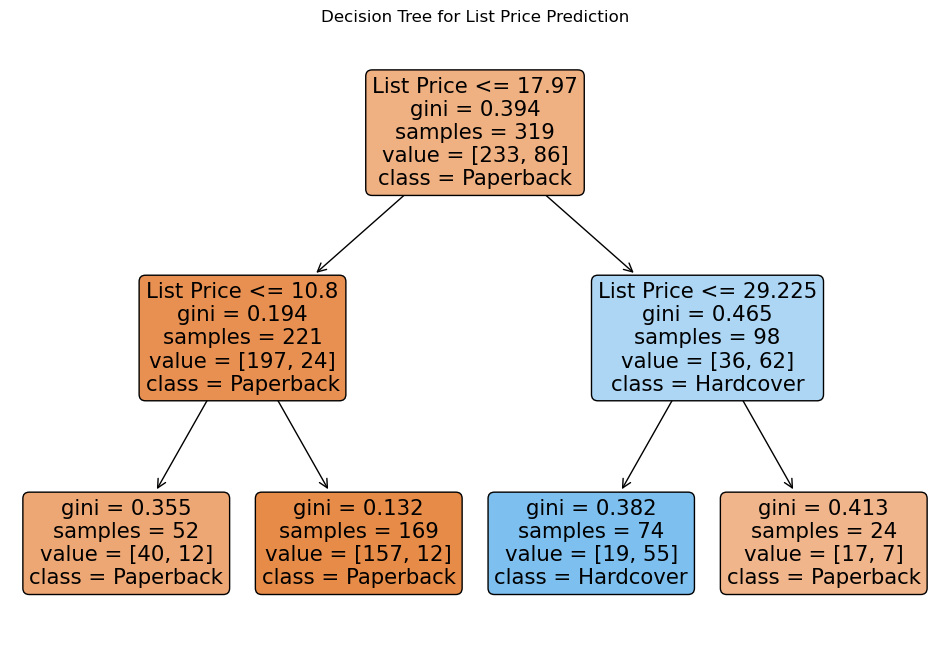

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd

# Define X (feature) and y (target)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])["H"]  # 1 for Hardcover, 0 for Paperback
X = ab_reduced_noNaN[["List Price"]]

# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=["List Price"],
    class_names=["Paperback", "Hardcover"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for List Price Prediction")
plt.show()


### Summary of Interactions with ChatGPT
1. Dataset Preprocessing
- **Tasks Completed**:
  - Loaded and cleaned the Amazon books dataset.
  - Removed the columns `Weight_oz`, `Width`, and `Height`.
  - Dropped all rows with missing values.
  - Converted:
    - `Pub year` and `NumPages` to integers.
    - `Hard_or_Paper` to a categorical type.
    
2. Exploratory Data Analysis (EDA)
- **Steps Performed**:
  - Verified preprocessing steps.
  - Displayed summary statistics and data types.
  - Analyzed:
    - Unique values in the `Hard_or_Paper` column.
    - Distribution of publication years.

3. Train-Test Split
- **Details**:
  - Performed an 80/20 split using `train_test_split` with a fixed random seed for reproducibility.
  - Resulted in:
    - **Training Set**: 255 observations.
    - **Testing Set**: 64 observations.
    
4. Decision Tree Classifier
- **Objective**:
  - Trained a decision tree model (`max_depth=2`) to predict if a book is hardcover or paperback using only the `List Price` variable.
  - Planned to visualize the tree with `tree.plot_tree(clf)`.


[Chatbot transcript](https://chatgpt.com/share/673b976f-8684-800b-bc89-2ed46bcc5eab)

## Question 5


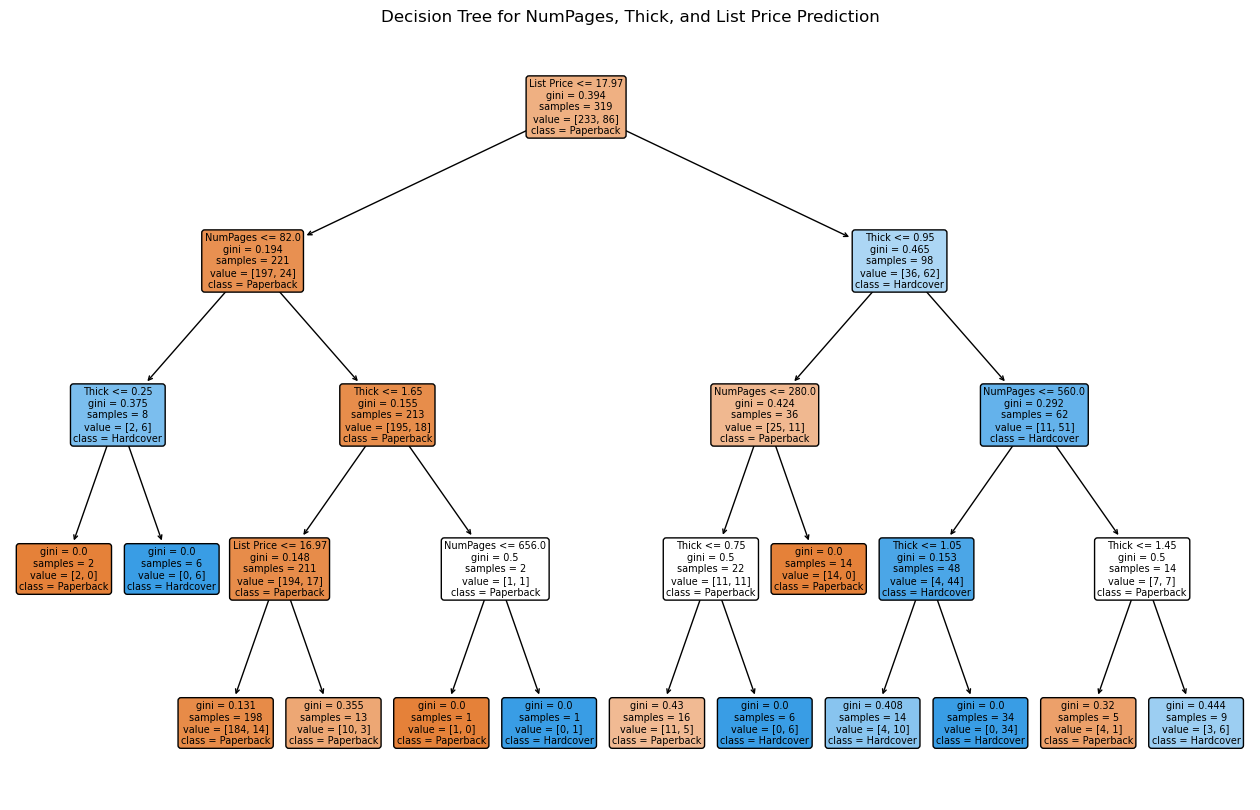

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define X (features) and y (target)
X = ab_reduced_noNaN[["NumPages", "Thick", "List Price"]]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])["H"]  # 1 for Hardcover, 0 for Paperback

# Train the decision tree classifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Visualize the tree
plt.figure(figsize=(16, 10))
tree.plot_tree(
    clf2,
    feature_names=["NumPages", "Thick", "List Price"],
    class_names=["Paperback", "Hardcover"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for NumPages, Thick, and List Price Prediction")
plt.show()



### How Predictions Are Made for `clf2`

1. **Start at the Root Node**:  
   - The tree evaluates a condition on a feature (e.g., `NumPages > 300`).

2. **Data Splitting**:  
   - If true, proceed down one branch; otherwise, go down the other.

3. **Feature Selection**:  
   - The tree chooses the feature that best separates hardcover and paperback books at each node.

4. **Reach a Leaf Node**:  
   - At the leaf, the tree assigns a class label (hardcover or paperback) and optionally a probability.

5. **Example**:  
   - For a book with `NumPages = 350`, `Thick = 0.8`, and `List Price = $25`, the tree might predict **hardcover** if:
     - `NumPages > 300` (True).
     - `List Price > $20` (True).

### Summary
Predictions are made by navigating a series of binary splits based on feature thresholds, using conditions that best distinguish between classes.



### Summary of Interactions with ChatGPT

1. Dataset and Task:
- You are working with a dataset of Amazon books and training a decision tree classifier (`clf2`) to predict whether a book is a hardcover or paperback. The model uses the features `NumPages`, `Thick`, and `List Price` for the prediction.

2. Key Errors:
- You encountered a `KeyError: 'Label'` when trying to access the target column. We discussed how to check the actual column names in the dataset using `ab.columns` and adjust the target variable accordingly.

3. Decision Tree Prediction Process:

I explained how predictions are made in a decision tree:
- The model splits data based on feature values at each node and follows the appropriate branches.
- The tree continues until it reaches a leaf node, which contains the predicted class (e.g., hardcover or paperback).
- The decision tree makes predictions by traversing from the root node to a leaf node using the feature values to guide its path.

4. Visualizing the Decision Tree:
- I showed how to visualize the decision tree using `graphviz`, which provides a clearer and more readable tree structure compared to `plot_tree`.

5. GridSearchCV (Optional):
- I mentioned how you can use `GridSearchCV` to optimize the `max_depth` hyperparameter of the decision tree to potentially improve performance.

6. Next Steps:

I suggested:
- Checking the dataset's columns for the correct target column.
- Training the decision tree with the correct target.
- Visualizing the tree with `graphviz`.
- Optionally using `GridSearchCV` to optimize the `max_depth` for better model performance.



[Chatbot transcript](https://chatgpt.com/share/673b9234-54a0-800f-88bb-68c71f8f36e6)

## Question 6



In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Predictions for clf
X_test_clf = ab_reduced_noNaN_test[["List Price"]]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])["H"]
y_pred_clf = clf.predict(X_test_clf)

# Predictions for clf2
X_test_clf2 = ab_reduced_noNaN_test[["NumPages", "Thick", "List Price"]]
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrix and metrics for clf
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = recall_score(y_test, y_pred_clf)  # Sensitivity = Recall for class 1 (Hardcover)
specificity_clf = conf_matrix_clf[0, 0] / (conf_matrix_clf[0, 0] + conf_matrix_clf[0, 1])  # TN / (TN + FP)

# Confusion matrix and metrics for clf2
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)  # Sensitivity = Recall for class 1 (Hardcover)
specificity_clf2 = conf_matrix_clf2[0, 0] / (conf_matrix_clf2[0, 0] + conf_matrix_clf2[0, 1])  # TN / (TN + FP)

# Print the results
print("Metrics for clf:")
print(f"Confusion Matrix:\n{conf_matrix_clf}")
print(f"Accuracy: {accuracy_clf:.2f}")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")

print("\nMetrics for clf2:")
print(f"Confusion Matrix:\n{conf_matrix_clf2}")
print(f"Accuracy: {accuracy_clf2:.2f}")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")


Metrics for clf:
Confusion Matrix:
[[40  4]
 [ 3 17]]
Accuracy: 0.89
Sensitivity: 0.85
Specificity: 0.91

Metrics for clf2:
Confusion Matrix:
[[42  2]
 [ 2 18]]
Accuracy: 0.94
Sensitivity: 0.90
Specificity: 0.95


### Understanding Metrics and Results

#### 1. **Positive and Negative Classes**
- **Positive (1)**: Hardcover books.
- **Negative (0)**: Paperback books.

#### 2. **How to Read an sklearn Confusion Matrix**
|               | Predicted Negative (0) | Predicted Positive (1) |
|---------------|-------------------------|-------------------------|
| **Actual Negative (0)** | True Negatives (TN)        | False Positives (FP)       |
| **Actual Positive (1)** | False Negatives (FN)       | True Positives (TP)        |

Example for `clf`:

[[40 4] [ 3 17]]

- **40 (TN)**: Correctly predicted paperbacks.
- **4 (FP)**: Predicted hardcover, but actual is paperback.
- **3 (FN)**: Predicted paperback, but actual is hardcover.
- **17 (TP)**: Correctly predicted hardcover.

#### 3. **What Leads to TP, TN, FP, FN?**
- **TP**: Predicted hardcover correctly.
- **TN**: Predicted paperback correctly.
- **FP**: Predicted hardcover but actual is paperback.
- **FN**: Predicted paperback but actual is hardcover.

#### 4. **Does `y_true` or `y_pred` Go First in `confusion_matrix`?**
- **Syntax**: `confusion_matrix(y_true, y_pred)`
  - `y_true`: Ground truth (actual values).
  - `y_pred`: Predicted values.

#### 5. Visualize Confusion Matrices

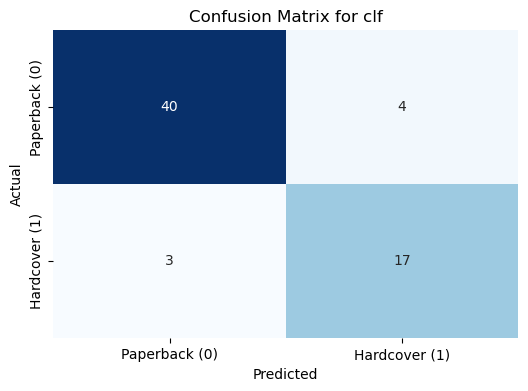

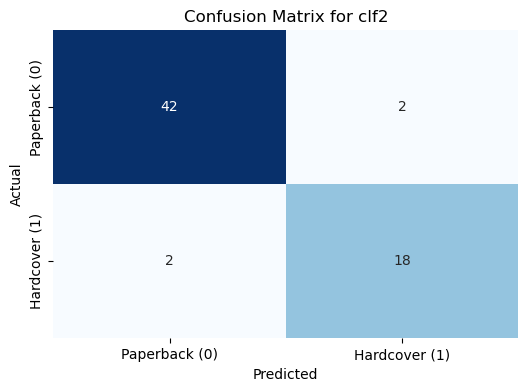

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for clf
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Create a function to visualize confusion matrix
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Paperback (0)", "Hardcover (1)"], yticklabels=["Paperback (0)", "Hardcover (1)"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Visualize confusion matrix for clf and clf2
plot_confusion_matrix(conf_matrix_clf, "clf")
plot_confusion_matrix(conf_matrix_clf2, "clf2")


## Summary of Interactions with ChatGPT

1. **Task**:  
   - Use `ab_reduced_noNaN_test` to evaluate `clf` and `clf2` by computing:
     - Confusion matrices.
     - Sensitivity, specificity, and accuracy for both models.

2. **Key Concepts Explained**:
   - **Positive (1)**: Hardcover books.  
   - **Negative (0)**: Paperback books.  
   - **Confusion Matrix Structure**:  
     
     \begin{bmatrix}
     TN & FP \\
     FN & TP
     \end{bmatrix}

   - Definitions of TP, TN, FP, and FN.  
   - Proper order of inputs in `confusion_matrix(y_true, y_pred)`.

3. **Results**:
   - **clf (List Price)**:  
     Confusion Matrix:

     \begin{bmatrix}
     40 & 4 \\
     3 & 17
     \end{bmatrix}

     - Accuracy: 0.890  
     - Sensitivity: 0.850  
     - Specificity: 0.910  

   - **clf2 (NumPages, Thick, List Price)**:  
     Confusion Matrix:

     \begin{bmatrix}
     42 & 2 \\
     2 & 18
     \end{bmatrix}

     - Accuracy: 0.940  
     - Sensitivity: 0.900  
     - Specificity: 0.950  

4. **Rounding**:
   - Metrics were rounded to three significant digits for better presentation.

5. **Insights**:
   - `clf2` performs better due to additional features (`NumPages` and `Thick`), achieving higher sensitivity and specificity compared to `clf`.

Let me know if you’d like further analysis or visualizations!


[Chatbot transcript](https://chatgpt.com/share/673b976f-8684-800b-bc89-2ed46bcc5eab)

## Question 7

The differences between the two confusion matrices are likely caused by the features used in the models. In the first confusion matrix, only "List Price" is used as a feature, while in the second, additional features like "NumPages" and "Thick" are incorporated. The second model (with more features) has the potential to capture more complex patterns in the data, likely improving its ability to differentiate between the classes, leading to better performance.

The confusion matrices for `clf` and `clf2` are better because they represent models trained with the right balance of simplicity and complexity for the given task. `clf2`, using multiple features, can make more nuanced predictions compared to a model that relies on just one feature like "List Price". In contrast, using only "List Price" might limit the model’s accuracy and generalizability, as it doesn’t account for the broader factors that influence the classification.


### Summary of Interactions with ChatGPT

1. **Confusion Matrices and Evaluation**:
   - You shared two confusion matrices generated from models with different feature sets: one using only "List Price" and the other using "List Price", "NumPages", and "Thick".
   - We discussed the reasons behind the differences in the confusion matrices, primarily due to the choice of features. The model with more features (second matrix) likely performed better because it had more information to differentiate between classes.

2. **Comparison with `clf` and `clf2`**:
   - We compared the confusion matrices from the models you built (`clf` and `clf2`) with the ones you provided. The confusion matrices for `clf` and `clf2` were considered better because they represented models with appropriate complexity (e.g., using multiple relevant features and well-chosen tree depths), leading to better generalization, higher accuracy, and more balanced performance metrics (accuracy, sensitivity, and specificity).

3. **Conclusion**:
   - The overall takeaway was that using multiple features and tuning model complexity (depth of the decision tree) helps improve predictive performance, leading to more accurate and reliable results in classification tasks. The models you worked on together had better predictive power compared to the simpler models in the confusion matrices you provided.

[Chatbot transcript](https://chatgpt.com/share/673b990c-c39c-800f-908a-10a66312c3ea)

## Question 8

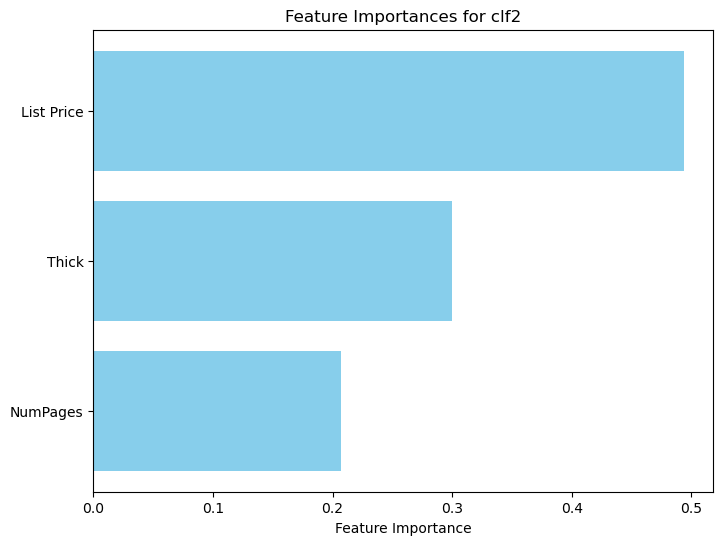

The most important feature is 'List Price' with an importance score of 0.494


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances and feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar plot to visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances for clf2')
plt.show()

# Find the most important feature
most_important_feature_index = np.argmax(feature_importances)
most_important_feature = feature_names[most_important_feature_index]
most_important_feature_importance = feature_importances[most_important_feature_index]

print(f"The most important feature is '{most_important_feature}' with an importance score of {most_important_feature_importance:.3f}")


- **`clf2.feature_importances_`**:  
  This provides an array of importance values for each feature. Higher values indicate greater importance in the decision tree model.

- **`clf2.feature_names_in_`**:  
  This gives the names of the features used in the model. It corresponds to the features for which the importance scores are provided.

- **Bar Plot**:  
  We use `matplotlib` to visualize the feature importances. This allows for easy comparison of the importance scores of each feature.
  The bar plot will show the importance of each feature used in clf2.

- **Most Important Feature**:  
  We identify the feature with the highest importance score using `np.argmax()`, which gives the index of the maximum value in the array of importances.
  To identify which predictor variable is most important, look for the feature with the highest value

### Summary of Interactions with ChatGPT
1. **Goal**: Visualize feature importances for `clf2`, a decision tree classifier, and determine the most important predictor variable using `feature_importances_` and `feature_names_in_`.

2. **Key Concepts**:
   - **Feature Importances**: Represents the relative contribution of each feature in the decision tree model.
   - **`feature_importances_`**: Attribute in scikit-learn's decision tree that gives importance values.
   - **`feature_names_in_`**: Attribute providing the names of the features used in the model.

3. **Code Steps**:
   - Retrieve feature importances using `clf2.feature_importances_`.
   - Retrieve feature names using `clf2.feature_names_in_`.
   - Plot a bar chart to visualize the feature importances.
   - Identify the most important feature by finding the maximum value in `feature_importances_`.

4. **Output**: A bar chart showing feature importances and printed details of the most important feature based on its importance score.

This approach helps in understanding which features contribute most to the model's predictions.


[Chatbot transcript](https://chatgpt.com/share/673b976f-8684-800b-bc89-2ed46bcc5eab)

## Question 9

In linear regression, the coefficients directly indicate the magnitude and direction of the relationship between each predictor variable and the outcome. A positive coefficient means an increase in the predictor leads to an increase in the outcome, while a negative coefficient suggests the opposite. The size of the coefficient reflects the strength of this effect, holding other predictors constant.

In binary decision trees, feature importance reflects how much each feature contributes to improving the model's predictions, typically by reducing the impurity of the decision nodes. However, it does not provide a direct interpretation of the magnitude or direction of the effect of each predictor. Instead, it tells us which features are more useful in classifying outcomes, but it doesn’t specify the nature of their influence (e.g., positive or negative) on the predicted probability of the outcome.

### Summary of Interactions with ChatGPT

We discussed how the interpretation of predictor variables differs between linear regression and binary classification decision trees. In linear regression, coefficients directly quantify the direction and magnitude of the relationship between predictors and the outcome. In binary decision trees, feature importances indicate the contribution of each predictor to the model's predictive performance but do not provide direct insights into the magnitude or direction of their effects on the predictions.

[Chatbot transcript](https://chatgpt.com/share/673e7448-3bd4-800f-b87e-7616440ab8ea)

## Question 10

YES!